# Question 1

experiment_reward:  2356.0


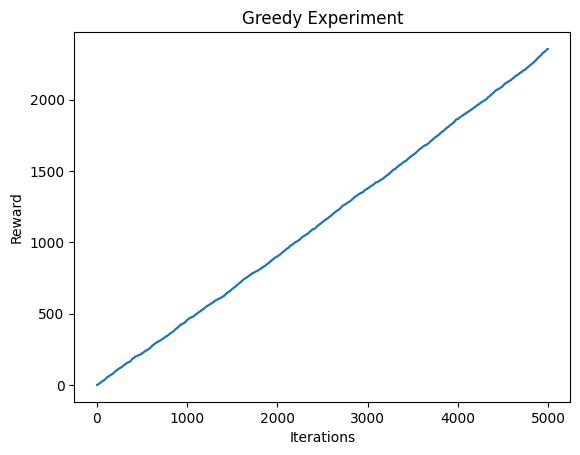

average_experiment_reward:  2397.08


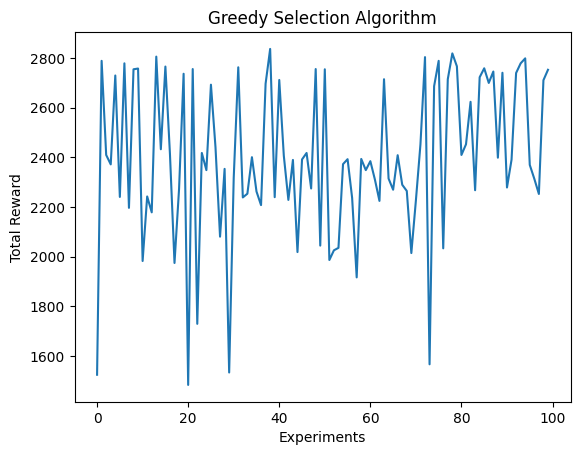

In [ ]:
# Greedy Action Selection Algorithm

import matplotlib.pyplot as plt
import numpy as np

N_ARMS = 6
ARM_REWARD_PROBABILITY = np.array([0.55, 0.45, 0.3, 0.4, 0.35, 0.48])
REWARD = np.ones(N_ARMS)
EXPERIMENTS = 100
ITERATIONS = 5000

class Greedy:
  def __init__(self, N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS):
    self.N_ARMS = N_ARMS
    self.REWARD = REWARD
    self.ARM_REWARD_PROBABILITY = ARM_REWARD_PROBABILITY
    self.ITERATIONS = ITERATIONS
    self.avg_reward = np.zeros(N_ARMS)
    self.times_picked = np.zeros(N_ARMS)
    self.random_number_generator = np.random.default_rng()

  def pick_arm(self, arm_index):
    random = self.random_number_generator.random()
    reward_obtained = 0

    if random < self.ARM_REWARD_PROBABILITY[arm_index]:
      reward_obtained = self.REWARD[arm_index]

    numerator = self.avg_reward[arm_index] * self.times_picked[arm_index] + reward_obtained
    denominator = self.times_picked[arm_index] + 1

    self.avg_reward[arm_index] = numerator / denominator
    self.times_picked[arm_index] += 1

    return reward_obtained

  def start_experiment(self):
    experiment_reward = 0

    # initially we pick all the arms once
    for i in range(self.N_ARMS):
      experiment_reward += self.pick_arm(i)

    # compute best arm
    for i in range(self.ITERATIONS - self.N_ARMS):
      best_arm = np.argmax(self.avg_reward)
      experiment_reward += self.pick_arm(best_arm)

    return experiment_reward

  def view_sample_experiment(self):
    all_rewards = []
    experiment_reward = 0

     # initially we pick all the arms once
    for i in range(self.N_ARMS):
      experiment_reward += self.pick_arm(i)
      all_rewards.append(experiment_reward)

    # compute best arm
    for i in range(self.ITERATIONS - self.N_ARMS):
      best_arm = np.argmax(self.avg_reward)
      experiment_reward += self.pick_arm(best_arm)
      all_rewards.append(experiment_reward)

    print("experiment_reward: ", experiment_reward)
    fig, ax = plt.subplots()
    ax.plot(range(ITERATIONS), all_rewards)
    ax.set(xlabel="Iterations", ylabel="Reward", title="Greedy Experiment")
    plt.show()

greedy = Greedy(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS)
greedy.view_sample_experiment()

a1_rewards = []
for e in range(EXPERIMENTS):
  greedy = Greedy(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS)
  reward = greedy.start_experiment()
  a1_rewards.append(reward)

print("average_experiment_reward: ", np.mean(a1_rewards))
fig, ax = plt.subplots()
ax.plot(range(EXPERIMENTS), a1_rewards)
ax.set(xlabel="Experiments", ylabel="Total Reward", title="Greedy Selection Algorithm")
plt.show()


experiment_reward:  2656.0


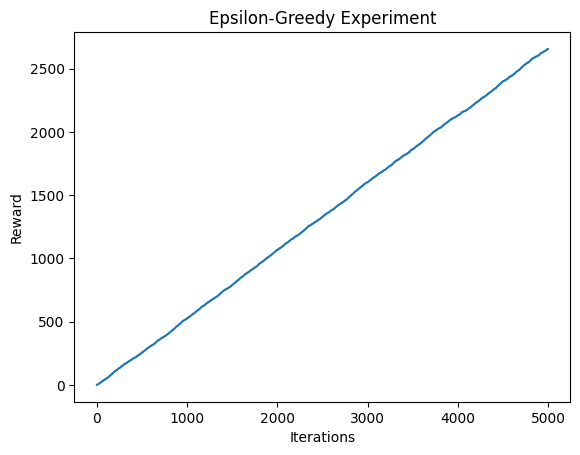

average_experiment_reward:  2665.71


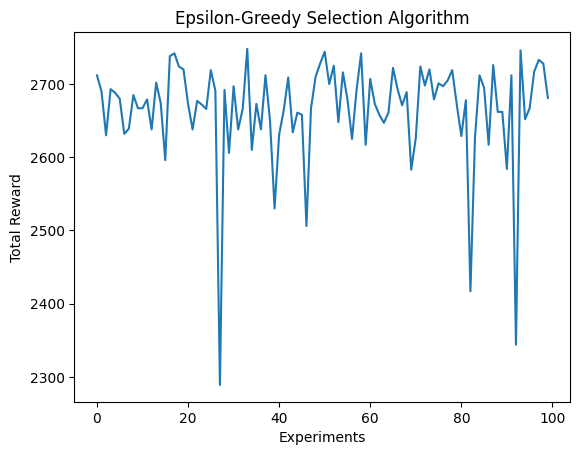

In [ ]:
# Epsilon-Greedy Action Selection Algorithm with epsilon = 0.1

import matplotlib.pyplot as plt
import numpy as np

N_ARMS = 6
ARM_REWARD_PROBABILITY = np.array([0.55, 0.45, 0.3, 0.4, 0.35, 0.48])
REWARD = np.ones(N_ARMS)
EXPERIMENTS = 100
ITERATIONS = 5000
EPSILON = 0.1

class Epsilon_Greedy:
  def __init__(self, N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, EPSILON):
    self.N_ARMS = N_ARMS
    self.REWARD = REWARD
    self.ARM_REWARD_PROBABILITY = ARM_REWARD_PROBABILITY
    self.ITERATIONS = ITERATIONS
    self.EPSILON = EPSILON
    self.avg_reward = np.zeros(N_ARMS)
    self.times_picked = np.zeros(N_ARMS)
    self.random_number_generator = np.random.default_rng()

  def pick_arm(self, arm_index):
    random = self.random_number_generator.random()
    reward_obtained = 0

    if random < self.ARM_REWARD_PROBABILITY[arm_index]:
      reward_obtained = self.REWARD[arm_index]

    numerator = self.avg_reward[arm_index] * self.times_picked[arm_index] + reward_obtained
    denominator = self.times_picked[arm_index] + 1

    self.avg_reward[arm_index] = numerator / denominator
    self.times_picked[arm_index] += 1

    return reward_obtained

  def start_experiment(self):
    experiment_reward = 0

    for i in range(self.ITERATIONS):
      random = self.random_number_generator.random()

      if random < self.EPSILON:
        # choose a random arm
        arm = np.random.choice(self.N_ARMS, 1)[0]
      else:
        # choose a greedy arm
        arm = np.argmax(self.avg_reward)

      experiment_reward += self.pick_arm(arm)

    return experiment_reward

  def view_sample_experiment(self):
    all_rewards = []
    experiment_reward = 0

    for i in range(self.ITERATIONS):
      random = self.random_number_generator.random()

      if random < self.EPSILON:
        # choose a random arm
        arm = np.random.choice(self.N_ARMS, 1)[0]
      else:
        # choose a greedy arm
        arm = np.argmax(self.avg_reward)

      experiment_reward += self.pick_arm(arm)
      all_rewards.append(experiment_reward)

    print("experiment_reward: ", experiment_reward)
    fig, ax = plt.subplots()
    ax.plot(range(ITERATIONS), all_rewards)
    ax.set(xlabel="Iterations", ylabel="Reward", title="Epsilon-Greedy Experiment")
    plt.show()

epsilon_greedy = Epsilon_Greedy(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, EPSILON)
epsilon_greedy.view_sample_experiment()

a2_rewards = []
for e in range(EXPERIMENTS):
  epsilon_greedy = Epsilon_Greedy(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, EPSILON)
  reward = epsilon_greedy.start_experiment()
  a2_rewards.append(reward)

print("average_experiment_reward: ", np.mean(a2_rewards))
fig, ax = plt.subplots()
ax.plot(range(EXPERIMENTS), a2_rewards)
ax.set(xlabel="Experiments", ylabel="Total Reward", title="Epsilon-Greedy Selection Algorithm")
plt.show()


max epsilon value:  0.4


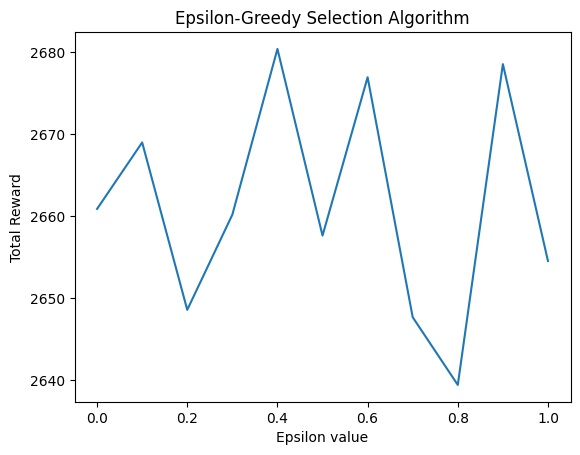

In [ ]:
# Exploration for Epsilon values

epsilon_rewards = []
epsilon_values = []
MAX_EPSILON = 1
STEP = 0.1
EXPERIMENTS = 20

epsilon = 0
while epsilon <= MAX_EPSILON:
  e_rewards = []
  for e in range(EXPERIMENTS):
    epsilon_greedy = Epsilon_Greedy(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, EPSILON)
    e_rewards.append(epsilon_greedy.start_experiment())

  epsilon_rewards.append(np.mean(e_rewards))
  epsilon_values.append(epsilon)
  epsilon += STEP

print("max epsilon value: ", epsilon_values[np.argmax(epsilon_rewards)])
fig, ax = plt.subplots()
ax.plot(epsilon_values, epsilon_rewards)
ax.set(xlabel="Epsilon value", ylabel="Total Reward", title="Epsilon-Greedy Selection Algorithm")
plt.show()

average_experiment_reward:  2142.85


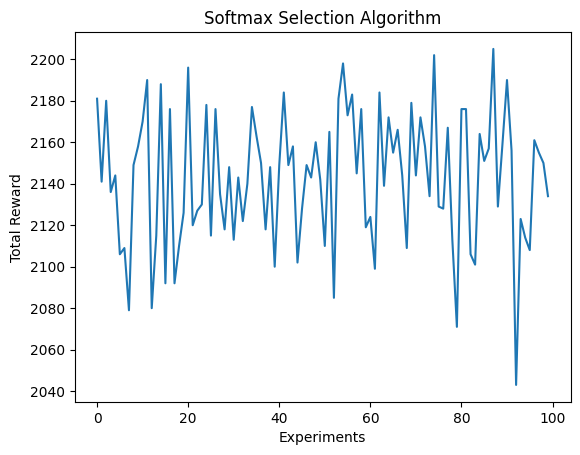

In [ ]:
# Softmax Action Selection Algorithm

import matplotlib.pyplot as plt
import numpy as np
import math

N_ARMS = 6
ARM_REWARD_PROBABILITY = np.array([0.55, 0.45, 0.3, 0.4, 0.35, 0.48])
REWARD = np.ones(N_ARMS)
EXPERIMENTS = 100
ITERATIONS = 5000

class Softmax():
  def __init__(self, N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS):
    self.N_ARMS = N_ARMS
    self.REWARD = REWARD
    self.ARM_REWARD_PROBABILITY = ARM_REWARD_PROBABILITY
    self.ITERATIONS = ITERATIONS
    self.arm_0_times_picked = []
    self.arm_1_times_picked = []
    self.arm_2_times_picked = []
    self.arm_3_times_picked = []
    self.arm_4_times_picked = []
    self.arm_5_times_picked = []
    self.p1 = []
    self.p2 = []
    self.p3 = []
    self.p4 = []
    self.p5 = []
    self.p6 = []
    self.avg_reward = np.zeros(N_ARMS)
    self.times_picked = np.zeros(N_ARMS)
    self.random_number_generator = np.random.default_rng()

  def pick_arm(self, arm_index):
    random = self.random_number_generator.random()
    reward_obtained = 0

    if random < self.ARM_REWARD_PROBABILITY[arm_index]:
      reward_obtained = self.REWARD[arm_index]

    numerator = self.avg_reward[arm_index] * self.times_picked[arm_index] + reward_obtained
    denominator = self.times_picked[arm_index] + 1

    self.avg_reward[arm_index] = numerator / denominator
    self.times_picked[arm_index] += 1

    return reward_obtained

  def select_arm(self):
    z = sum([math.exp(v) for v in self.avg_reward])
    probabilities = [math.exp(v) / z for v in self.avg_reward]
    self.p1.append(probabilities[0])
    self.p2.append(probabilities[1])
    self.p3.append(probabilities[2])
    self.p4.append(probabilities[3])
    self.p5.append(probabilities[4])
    self.p6.append(probabilities[5])

    random = self.random_number_generator.random()
    cumulative_probability = 0

    for i in range(len(probabilities)):
      cumulative_probability += probabilities[i]

      if cumulative_probability > random:
        return i

    return self.N_ARMS - 1

  def start_experiment(self):
    experiment_reward = 0

    for i in range(self.ITERATIONS):
      arm = self.select_arm()
      experiment_reward += self.pick_arm(arm)

    return experiment_reward

  def view_sample_experiment(self):
    all_rewards = []
    experiment_reward = 0

    for i in range(self.ITERATIONS):
      arm = self.select_arm()
      self.arm_0_times_picked.append(self.times_picked[0]/(i+1))
      self.arm_1_times_picked.append(self.times_picked[1]/(i+1))
      self.arm_2_times_picked.append(self.times_picked[2]/(i+1))
      self.arm_3_times_picked.append(self.times_picked[3]/(i+1))
      self.arm_4_times_picked.append(self.times_picked[4]/(i+1))
      self.arm_5_times_picked.append(self.times_picked[5]/(i+1))

      experiment_reward += self.pick_arm(arm)
      all_rewards.append(experiment_reward)

    fig, ax = plt.subplots()
    ax.plot(range(ITERATIONS), all_rewards)
    ax.set(xlabel="Iterations", ylabel="Reward", title="Softmax Experiment")
    plt.show()

a3_rewards = []
for e in range(EXPERIMENTS):
  softmax = Softmax(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS)
  reward = softmax.start_experiment()
  a3_rewards.append(reward)

print("average_experiment_reward: ", np.mean(a3_rewards))
fig, ax = plt.subplots()
ax.plot(range(EXPERIMENTS), a3_rewards)
ax.set(xlabel="Experiments", ylabel="Total Reward", title="Softmax Selection Algorithm")
plt.show()

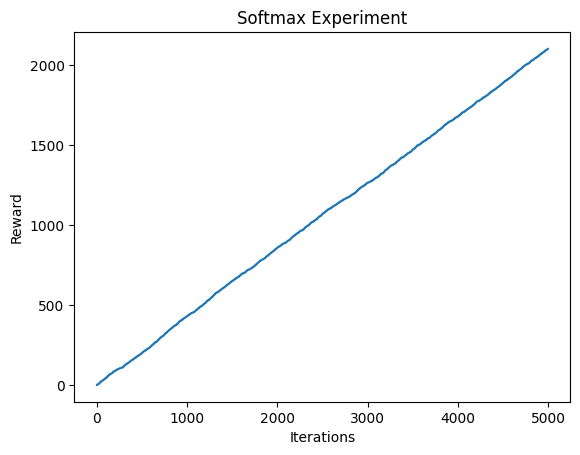

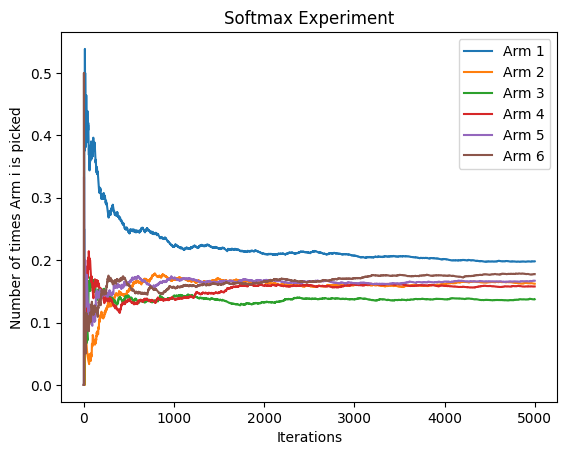

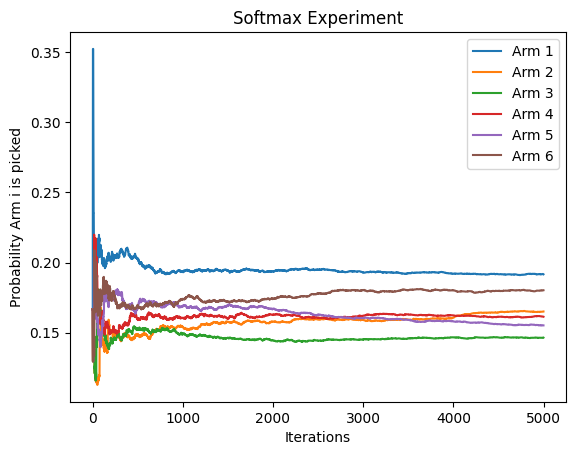

In [ ]:
softmax = Softmax(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS)
softmax.view_sample_experiment()

fig, ax = plt.subplots()
ax.plot(range(ITERATIONS), softmax.arm_0_times_picked, label="Arm 1")
ax.plot(range(ITERATIONS), softmax.arm_1_times_picked, label="Arm 2")
ax.plot(range(ITERATIONS), softmax.arm_2_times_picked, label="Arm 3")
ax.plot(range(ITERATIONS), softmax.arm_3_times_picked, label="Arm 4")
ax.plot(range(ITERATIONS), softmax.arm_4_times_picked, label="Arm 5")
ax.plot(range(ITERATIONS), softmax.arm_5_times_picked, label="Arm 6")
ax.set(xlabel="Iterations", ylabel="Number of times Arm i is picked", title="Softmax Experiment")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(range(ITERATIONS), softmax.p1, label="Arm 1")
ax.plot(range(ITERATIONS), softmax.p2, label="Arm 2")
ax.plot(range(ITERATIONS), softmax.p3, label="Arm 3")
ax.plot(range(ITERATIONS), softmax.p4, label="Arm 4")
ax.plot(range(ITERATIONS), softmax.p5, label="Arm 5")
ax.plot(range(ITERATIONS), softmax.p6, label="Arm 6")
ax.set(xlabel="Iterations", ylabel="Probability Arm i is picked", title="Softmax Experiment")
plt.legend()
plt.show()

experiment_reward:  2658.0


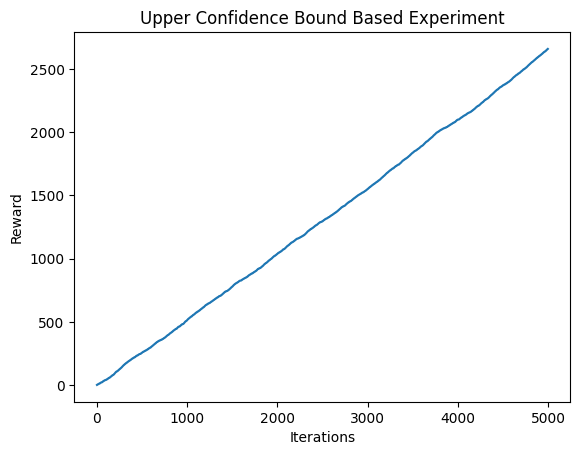

average_experiment_reward:  2704.01


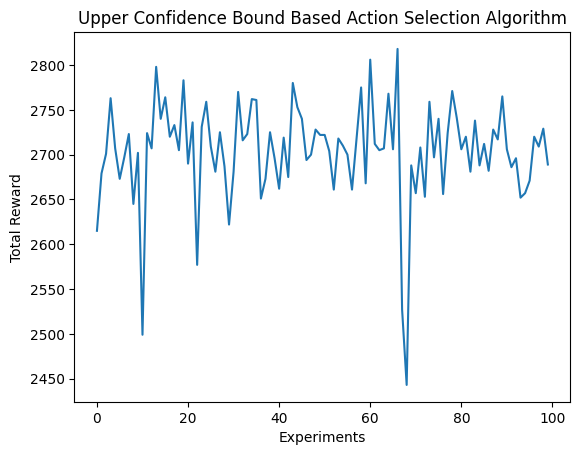

In [ ]:
# Upper Confidence Bound Based Action Selection

import matplotlib.pyplot as plt
import numpy as np

N_ARMS = 6
ARM_REWARD_PROBABILITY = np.array([0.55, 0.45, 0.3, 0.4, 0.35, 0.48])
REWARD = np.ones(N_ARMS)
EXPERIMENTS = 100
ITERATIONS = 5000
C = 0.4

class UCB():
  def __init__(self, N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, C):
    self.N_ARMS = N_ARMS
    self.REWARD = REWARD
    self.ARM_REWARD_PROBABILITY = ARM_REWARD_PROBABILITY
    self.ITERATIONS = ITERATIONS
    self.C = C
    self.avg_reward = np.zeros(N_ARMS)
    self.times_picked = np.zeros(N_ARMS)
    self.random_number_generator = np.random.default_rng()

  def pick_arm(self, arm_index):
    random = self.random_number_generator.random()
    reward_obtained = 0

    if random < self.ARM_REWARD_PROBABILITY[arm_index]:
      reward_obtained = self.REWARD[arm_index]

    numerator = self.avg_reward[arm_index] * self.times_picked[arm_index] + reward_obtained
    denominator = self.times_picked[arm_index] + 1

    self.avg_reward[arm_index] = numerator / denominator
    self.times_picked[arm_index] += 1

    return reward_obtained

  def start_experiment(self):
    experiment_reward = 0

    # initially we pick all the arms once to avoid zero division error
    for i in range(self.N_ARMS):
      experiment_reward += self.pick_arm(i)

    for i in range(ITERATIONS - N_ARMS):
      best_arm = np.argmax(self.avg_reward + self.C * (np.array([np.log(i + N_ARMS)])/self.times_picked)**0.5)
      experiment_reward += self.pick_arm(best_arm)

    return experiment_reward

  def view_sample_experiment(self):
    all_rewards = []
    experiment_reward = 0

    # initially we pick all the arms once to avoid zero division error
    for i in range(self.N_ARMS):
      experiment_reward += self.pick_arm(i)
      all_rewards.append(experiment_reward)

    for i in range(ITERATIONS - N_ARMS):
      best_arm = np.argmax(self.avg_reward + self.C * (np.array([np.log(i + N_ARMS)])/self.times_picked)**0.5)
      experiment_reward += self.pick_arm(best_arm)
      all_rewards.append(experiment_reward)

    print("experiment_reward: ", experiment_reward)
    fig, ax = plt.subplots()
    ax.plot(range(ITERATIONS), all_rewards)
    ax.set(xlabel="Iterations", ylabel="Reward", title="Upper Confidence Bound Based Experiment")
    plt.show()

ucb = UCB(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, C)
ucb.view_sample_experiment()

a4_rewards = []
for e in range(EXPERIMENTS):
  ucb = UCB(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, C)
  reward = ucb.start_experiment()
  a4_rewards.append(reward)

print("average_experiment_reward: ", np.mean(a4_rewards))
fig, ax = plt.subplots()
ax.plot(range(EXPERIMENTS), a4_rewards)
ax.set(xlabel="Experiments", ylabel="Total Reward", title="Upper Confidence Bound Based Action Selection Algorithm")
plt.show()

max c value:  0.4


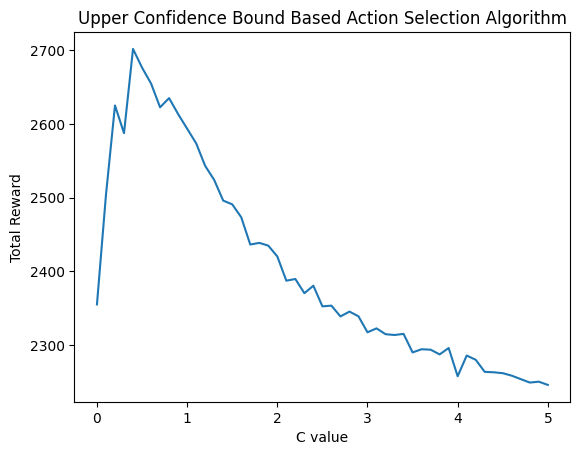

In [ ]:
# Exploration for C values

c_rewards = []
c_values = []
MAX_C = 5
STEP = 0.1
EXPERIMENTS = 20

c = 0
while c < MAX_C:
  e_rewards = []
  for e in range(EXPERIMENTS):
    ucb = UCB(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS, c)
    e_rewards.append(ucb.start_experiment())

  c_rewards.append(np.mean(e_rewards))
  c_values.append(c)
  c += STEP

print("max c value: ", c_values[np.argmax(c_rewards)])
fig, ax = plt.subplots()
ax.plot(c_values, c_rewards)
ax.set(xlabel="C value", ylabel="Total Reward", title="Upper Confidence Bound Based Action Selection Algorithm")
plt.show()

experiment_reward:  2733.0


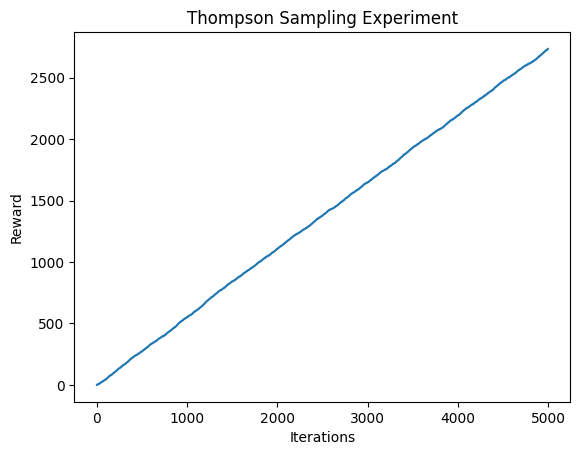

average_experiment_reward:  2725.77


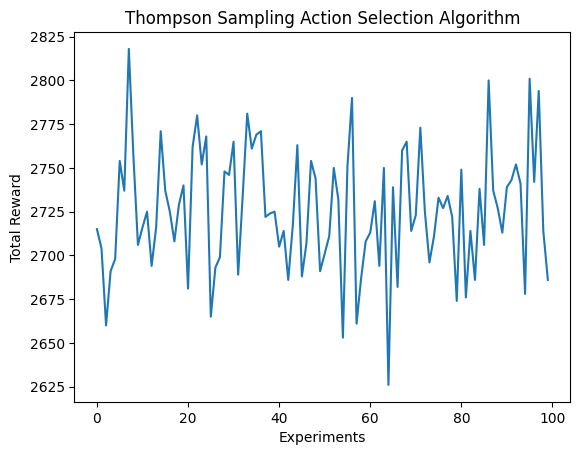

In [ ]:
# Thompson Sampling

import matplotlib.pyplot as plt
import numpy as np

N_ARMS = 6
ARM_REWARD_PROBABILITY = np.array([0.55, 0.45, 0.3, 0.4, 0.35, 0.48])
REWARD = np.ones(N_ARMS)
EXPERIMENTS = 100
ITERATIONS = 5000

class Thompson_Sampling():
  def __init__(self, N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS):
    self.N_ARMS = N_ARMS
    self.REWARD = REWARD
    self.ARM_REWARD_PROBABILITY = ARM_REWARD_PROBABILITY
    self.ITERATIONS = ITERATIONS
    self.succ_fail = [[0,0] for i in range(N_ARMS)]
    self.random_number_generator = np.random.default_rng()

  def pick_arm(self, arm_index):
    random = self.random_number_generator.random()

    if random < self.ARM_REWARD_PROBABILITY[arm_index]:
      self.succ_fail[0] += REWARD[arm_index]
      self.succ_fail[1] += (1 - REWARD[arm_index])
      reward_obtained = REWARD[arm_index]
    else:
      self.succ_fail[arm_index][0] += 0
      self.succ_fail[arm_index][1] += (1 - 0)
      reward_obtained = 0

    return reward_obtained

  def start_experiment(self):
    experiment_reward = 0

    for i in range(self.ITERATIONS):
      # Sample a data point (thompson sampling) from all arms' Beta distrib
      samples = [np.random.beta(s+1, f+1) for s, f in self.succ_fail]  # add 1 because can't pass 0

      # Pick the arm with highest sampled estimate
      best_arm = np.argmax(samples)

      experiment_reward += self.pick_arm(best_arm)

    return experiment_reward

  def view_sample_experiment(self):
    all_rewards = []
    experiment_reward = 0

    for i in range(self.ITERATIONS):
      # Sample a data point (thompson sampling) from all arms' Beta distrib
      samples = [np.random.beta(s+1, f+1) for s, f in self.succ_fail]  # add 1 because can't pass 0

      # Pick the arm with highest sampled estimate
      best_arm = np.argmax(samples)

      experiment_reward += self.pick_arm(best_arm)
      all_rewards.append(experiment_reward)

    print("experiment_reward: ", experiment_reward)
    fig, ax = plt.subplots()
    ax.plot(range(ITERATIONS), all_rewards)
    ax.set(xlabel="Iterations", ylabel="Reward", title="Thompson Sampling Experiment")
    plt.show()

thompson = Thompson_Sampling(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS)
thompson.view_sample_experiment()

a5_rewards = []
for e in range(EXPERIMENTS):
  thompson = Thompson_Sampling(N_ARMS, REWARD, ARM_REWARD_PROBABILITY, ITERATIONS)
  reward = thompson.start_experiment()
  a5_rewards.append(reward)

print("average_experiment_reward: ", np.mean(a5_rewards))
fig, ax = plt.subplots()
ax.plot(range(EXPERIMENTS), a5_rewards)
ax.set(xlabel="Experiments", ylabel="Total Reward", title="Thompson Sampling Action Selection Algorithm")
plt.show()

average reward for Greedy:  2397.08
average reward for Epsilon Greedy:  2665.71
average reward for Softmax:  2142.85
average reward for Upper Confidence Bound:  2704.01
average reward for Thompson:  2725.77


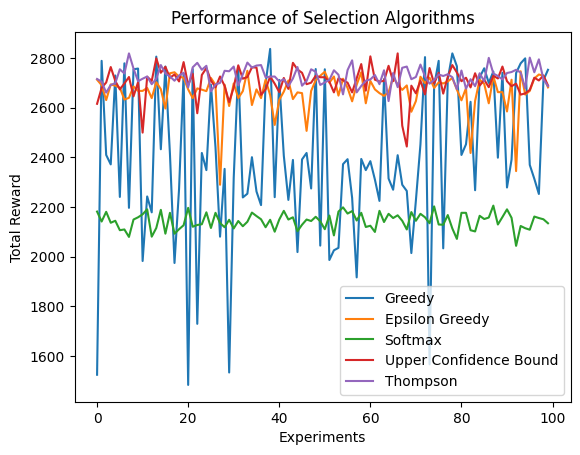

In [ ]:
print("average reward for Greedy: ", np.mean(a1_rewards))
print("average reward for Epsilon Greedy: ", np.mean(a2_rewards))
print("average reward for Softmax: ", np.mean(a3_rewards))
print("average reward for Upper Confidence Bound: ", np.mean(a4_rewards))
print("average reward for Thompson: ", np.mean(a5_rewards))

fig, ax = plt.subplots()
ax.plot(range(EXPERIMENTS), a1_rewards, label="Greedy")
ax.plot(range(EXPERIMENTS), a2_rewards, label="Epsilon Greedy")
ax.plot(range(EXPERIMENTS), a3_rewards, label="Softmax")
ax.plot(range(EXPERIMENTS), a4_rewards, label="Upper Confidence Bound")
ax.plot(range(EXPERIMENTS), a5_rewards, label="Thompson")
ax.set(xlabel="Experiments", ylabel="Total Reward", title="Performance of Selection Algorithms")
plt.legend()
plt.show()

# Question 2
Implement the Pong example described in class (Lecture 10) using the Gym or Gymnasium
environment using both DQN and Reinforce. In the class, I explained how Reinforce is implemented
on Pong. Here the target is for you to implement both DQN and Reinforce using a single hidden
layer neural network (for either policy or value). Compare and contrast the training and testing
performance of DQN and Reinforce.
Please provide the code and the results.

## Deep Q Network

In [ ]:
%%bash
pip install "gym[atari, accept-rom-license]"

In [ ]:
import gym
gym.envs.registration.registry.keys()

dict_keys(['ALE/Tetris-v5', 'ALE/Tetris-ram-v5', 'ALE/NameThisGame-v5', 'ALE/NameThisGame-ram-v5', 'ALE/Boxing-v5', 'ALE/Boxing-ram-v5', 'ALE/TimePilot-v5', 'ALE/TimePilot-ram-v5', 'ALE/Riverraid-v5', 'ALE/Riverraid-ram-v5', 'ALE/Solaris-v5', 'ALE/Solaris-ram-v5', 'ALE/Asterix-v5', 'ALE/Asterix-ram-v5', 'ALE/Crossbow-v5', 'ALE/Crossbow-ram-v5', 'ALE/MarioBros-v5', 'ALE/MarioBros-ram-v5', 'ALE/Blackjack-v5', 'ALE/Blackjack-ram-v5', 'ALE/Adventure-v5', 'ALE/Adventure-ram-v5', 'ALE/Gravitar-v5', 'ALE/Gravitar-ram-v5', 'ALE/Robotank-v5', 'ALE/Robotank-ram-v5', 'ALE/Klax-v5', 'ALE/Klax-ram-v5', 'ALE/Berzerk-v5', 'ALE/Berzerk-ram-v5', 'ALE/Skiing-v5', 'ALE/Skiing-ram-v5', 'ALE/Asteroids-v5', 'ALE/Asteroids-ram-v5', 'ALE/DoubleDunk-v5', 'ALE/DoubleDunk-ram-v5', 'ALE/SpaceInvaders-v5', 'ALE/SpaceInvaders-ram-v5', 'ALE/UpNDown-v5', 'ALE/UpNDown-ram-v5', 'ALE/Frogger-v5', 'ALE/Frogger-ram-v5', 'ALE/Carnival-v5', 'ALE/Carnival-ram-v5', 'ALE/CrazyClimber-v5', 'ALE/CrazyClimber-ram-v5', 'ALE/Qbert-

In [ ]:
import os
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

class DeepQNetwork(nn.Module):
    def __init__(self, lr, n_actions, name, input_dims, chkpt_dir):
        super(DeepQNetwork, self).__init__()
        self.checkpoint_dir = chkpt_dir
        self.checkpoint_file = os.path.join(self.checkpoint_dir, name)

        self.conv1 = nn.Conv2d(input_dims[0], 32, 8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, 3, stride=1)

        fc_input_dims = self.calculate_conv_output_dims(input_dims)

        self.fc1 = nn.Linear(fc_input_dims, 512)
        self.fc2 = nn.Linear(512, n_actions)

        self.optimizer = optim.RMSprop(self.parameters(), lr=lr)

        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def calculate_conv_output_dims(self, input_dims):
        state = T.zeros(1, *input_dims)
        dims = self.conv1(state)
        dims = self.conv2(dims)
        dims = self.conv3(dims)
        return int(np.prod(dims.size()))

    def forward(self, state):
        conv1 = F.relu(self.conv1(state))
        conv2 = F.relu(self.conv2(conv1))
        conv3 = F.relu(self.conv3(conv2))
        # conv3 shape is BS x n_filters x H x W
        conv_state = conv3.view(conv3.size()[0], -1)
        # conv_state shape is BS x (n_filters * H * W)
        flat1 = F.relu(self.fc1(conv_state))
        actions = self.fc2(flat1)

        return actions

    def save_checkpoint(self):
        print('... saving checkpoint ...')
        T.save(self.state_dict(), self.checkpoint_file)

    def load_checkpoint(self):
        print('... loading checkpoint ...')
        self.load_state_dict(T.load(self.checkpoint_file))

In [ ]:
import numpy as np

class ReplayBuffer(object):
    def __init__(self, max_size, input_shape, n_actions):
        self.mem_size = max_size
        self.mem_cntr = 0
        self.state_memory = np.zeros((self.mem_size, *input_shape),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_shape),
                                         dtype=np.float32)

        self.action_memory = np.zeros(self.mem_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)

    def store_transition(self, state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = done
        self.mem_cntr += 1

    def sample_buffer(self, batch_size):
        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, batch_size, replace=False)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_ = self.new_state_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_, terminal

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import torch as T

class DQNAgent(object):
    def __init__(self, gamma, epsilon, lr, n_actions, input_dims,
                 mem_size, batch_size, eps_min=0.01, eps_dec=5e-7,
                 replace=1000, algo=None, env_name=None, chkpt_dir='tmp/dqn'):
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr
        self.n_actions = n_actions
        self.input_dims = input_dims
        self.batch_size = batch_size
        self.eps_min = eps_min
        self.eps_dec = eps_dec
        self.replace_target_cnt = replace
        self.algo = algo
        self.env_name = env_name
        self.chkpt_dir = chkpt_dir
        self.action_space = [i for i in range(n_actions)]
        self.learn_step_counter = 0

        self.memory = ReplayBuffer(mem_size, input_dims, n_actions)

        self.q_eval = DeepQNetwork(self.lr, self.n_actions,
                                    input_dims=self.input_dims,
                                    name=self.env_name+'_'+self.algo+'_q_eval',
                                    chkpt_dir=self.chkpt_dir)

        self.q_next = DeepQNetwork(self.lr, self.n_actions,
                                    input_dims=self.input_dims,
                                    name=self.env_name+'_'+self.algo+'_q_next',
                                    chkpt_dir=self.chkpt_dir)

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor([observation],dtype=T.float).to(self.q_eval.device)
            actions = self.q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action

    def store_transition(self, state, action, reward, state_, done):
        self.memory.store_transition(state, action, reward, state_, done)

    def sample_memory(self):
        state, action, reward, new_state, done = \
                                self.memory.sample_buffer(self.batch_size)

        states = T.tensor(state).to(self.q_eval.device)
        rewards = T.tensor(reward).to(self.q_eval.device)
        dones = T.tensor(done).to(self.q_eval.device)
        actions = T.tensor(action).to(self.q_eval.device)
        states_ = T.tensor(new_state).to(self.q_eval.device)

        return states, actions, rewards, states_, dones

    def replace_target_network(self):
        if self.learn_step_counter % self.replace_target_cnt == 0:
            self.q_next.load_state_dict(self.q_eval.state_dict())

    def decrement_epsilon(self):
        self.epsilon = self.epsilon - self.eps_dec \
                           if self.epsilon > self.eps_min else self.eps_min

    def save_models(self):
        self.q_eval.save_checkpoint()
        self.q_next.save_checkpoint()

    def load_models(self):
        self.q_eval.load_checkpoint()
        self.q_next.load_checkpoint()

    def learn(self):
        if self.memory.mem_cntr < self.batch_size:
            return

        self.q_eval.optimizer.zero_grad()

        self.replace_target_network()

        states, actions, rewards, states_, dones = self.sample_memory()
        indices = np.arange(self.batch_size)

        q_pred = self.q_eval.forward(states)[indices, actions]
        q_next = self.q_next.forward(states_).max(dim=1)[0]

        q_next[dones] = 0.0
        q_target = rewards + self.gamma*q_next

        loss = self.q_eval.loss(q_target, q_pred).to(self.q_eval.device)
        loss.backward()
        self.q_eval.optimizer.step()
        self.learn_step_counter += 1

        self.decrement_epsilon()

In [ ]:
import collections
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gym

def plot_learning_curve(x, scores, epsilons, lines=None):
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Training Steps", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")

    if lines is not None:
        for line in lines:
            plt.axvline(x=line)

    # plt.savefig(filename)

class RepeatActionAndMaxFrame(gym.Wrapper):
    def __init__(self, env=None, repeat=4, clip_reward=False, no_ops=0,
                 fire_first=False):
        super(RepeatActionAndMaxFrame, self).__init__(env)
        self.repeat = repeat
        self.shape = env.observation_space.low.shape
        self.frame_buffer = np.zeros_like((2, self.shape))
        self.clip_reward = clip_reward
        self.no_ops = no_ops
        self.fire_first = fire_first

    def step(self, action):
        t_reward = 0.0
        done = False
        for i in range(self.repeat):
            obs, reward, done, info = self.env.step(action)
            if self.clip_reward:
                reward = np.clip(np.array([reward]), -1, 1)[0]
            t_reward += reward
            idx = i % 2
            self.frame_buffer[idx] = obs
            if done:
                break

        max_frame = np.maximum(self.frame_buffer[0], self.frame_buffer[1])
        return max_frame, t_reward, done, info

    def reset(self):
        obs = self.env.reset()
        no_ops = np.random.randint(self.no_ops)+1 if self.no_ops > 0 else 0
        for _ in range(no_ops):
            _, _, done, _ = self.env.step(0)
            if done:
                self.env.reset()
        if self.fire_first:
            assert self.env.unwrapped.get_action_meanings()[1] == 'FIRE'
            obs, _, _, _ = self.env.step(1)

        self.frame_buffer = np.zeros_like((2,self.shape))
        self.frame_buffer[0] = obs

        return obs

class PreprocessFrame(gym.ObservationWrapper):
    def __init__(self, shape, env=None):
        super(PreprocessFrame, self).__init__(env)
        self.shape = (shape[2], shape[0], shape[1])
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0,
                                    shape=self.shape, dtype=np.float32)

    def observation(self, obs):
        new_frame = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
        resized_screen = cv2.resize(new_frame, self.shape[1:],
                                    interpolation=cv2.INTER_AREA)
        new_obs = np.array(resized_screen, dtype=np.uint8).reshape(self.shape)
        new_obs = new_obs / 255.0

        return new_obs

class StackFrames(gym.ObservationWrapper):
    def __init__(self, env, repeat):
        super(StackFrames, self).__init__(env)
        self.observation_space = gym.spaces.Box(
                            env.observation_space.low.repeat(repeat, axis=0),
                            env.observation_space.high.repeat(repeat, axis=0),
                            dtype=np.float32)
        self.stack = collections.deque(maxlen=repeat)

    def reset(self):
        self.stack.clear()
        observation = self.env.reset()
        for _ in range(self.stack.maxlen):
            self.stack.append(observation)

        return np.array(self.stack).reshape(self.observation_space.low.shape)

    def observation(self, observation):
        self.stack.append(observation)

        return np.array(self.stack).reshape(self.observation_space.low.shape)

def make_env(env_name, shape=(84,84,1), repeat=4, clip_rewards=False,
             no_ops=0, fire_first=False):
    env = gym.make(env_name)
    env = RepeatActionAndMaxFrame(env, repeat, clip_rewards, no_ops, fire_first)
    env = PreprocessFrame(shape, env)
    env = StackFrames(env, repeat)

    return env

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is d

episode:  0 score:  -21.0  average score -21.0 best score -inf epsilon 1.00 steps 274


<ipython-input-7-d599c19002fb>:37: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  state = T.tensor([observation],dtype=T.float).to(self.q_eval.device)


episode:  1 score:  -20.0  average score -20.5 best score -21.00 epsilon 0.99 steps 559
episode:  2 score:  -21.0  average score -20.7 best score -20.50 epsilon 0.99 steps 843
episode:  3 score:  -21.0  average score -20.8 best score -20.50 epsilon 0.99 steps 1161
episode:  4 score:  -21.0  average score -20.8 best score -20.50 epsilon 0.99 steps 1453
episode:  5 score:  -21.0  average score -20.8 best score -20.50 epsilon 0.98 steps 1729
episode:  6 score:  -19.0  average score -20.6 best score -20.50 epsilon 0.98 steps 2078
episode:  7 score:  -21.0  average score -20.6 best score -20.50 epsilon 0.98 steps 2432
episode:  8 score:  -21.0  average score -20.7 best score -20.50 epsilon 0.97 steps 2722
episode:  9 score:  -21.0  average score -20.7 best score -20.50 epsilon 0.97 steps 2998
episode:  10 score:  -20.0  average score -20.6 best score -20.50 epsilon 0.97 steps 3337
episode:  11 score:  -21.0  average score -20.7 best score -20.50 epsilon 0.96 steps 3600
episode:  12 score:  

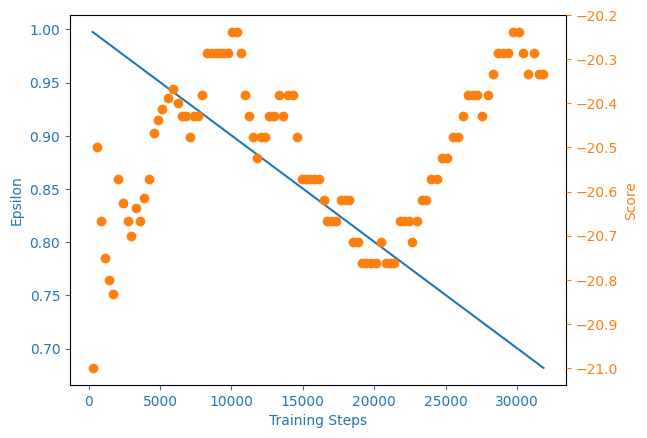

In [ ]:
import gym
import numpy as np
from gym import wrappers

if __name__ == '__main__':
    env = make_env('Pong-v0')
    best_score = -np.inf
    load_checkpoint = False
    n_games = 100

    agent = DQNAgent(gamma=0.99, epsilon=1, lr=0.0001,
                     input_dims=(env.observation_space.shape),
                     n_actions=env.action_space.n, mem_size=50000, eps_min=0.1,
                     batch_size=32, replace=1000, eps_dec=1e-5,
                     chkpt_dir='models/', algo='DQNAgent',
                     env_name='PongNoFrameskip-v4')

    if load_checkpoint:
        agent.load_models()

    fname = agent.algo + '_' + agent.env_name + '_lr' + str(agent.lr) +'_' \
            + str(n_games) + 'games'
    figure_file = 'plots/' + fname + '.png'
    # if you want to record video of your agent playing, do a mkdir tmp && mkdir tmp/dqn-video
    # and uncomment the following 2 lines.
    #env = wrappers.Monitor(env, "tmp/dqn-video",
    #                    video_callable=lambda episode_id: True, force=True)
    n_steps = 0
    scores, eps_history, steps_array = [], [], []

    for i in range(n_games):
        done = False
        observation = env.reset()

        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward

            if not load_checkpoint:
                agent.store_transition(observation, action,
                                     reward, observation_, done)
                agent.learn()
            observation = observation_
            n_steps += 1
        scores.append(score)
        steps_array.append(n_steps)

        avg_score = np.mean(scores[-100:])
        print('episode: ', i,'score: ', score,
             ' average score %.1f' % avg_score, 'best score %.2f' % best_score,
            'epsilon %.2f' % agent.epsilon, 'steps', n_steps)

        if avg_score > best_score:
            #if not load_checkpoint:
                #agent.save_models()
            best_score = avg_score

        eps_history.append(agent.epsilon)

    x = [i+1 for i in range(len(scores))]
    plot_learning_curve(steps_array, scores, eps_history)

## REINFORCE (policy gradient)



/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
<ipython-input-3-4475ae7eb58d>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is

resetting env. episode reward total was -17.000000. running mean: -17.000000
resetting env. episode reward total was -19.000000. running mean: -17.020000
resetting env. episode reward total was -21.000000. running mean: -17.059800
resetting env. episode reward total was -21.000000. running mean: -17.099202
resetting env. episode reward total was -21.000000. running mean: -17.138210
resetting env. episode reward total was -21.000000. running mean: -17.176828
resetting env. episode reward total was -21.000000. running mean: -17.215060
resetting env. episode reward total was -21.000000. running mean: -17.252909
resetting env. episode reward total was -21.000000. running mean: -17.290380
resetting env. episode reward total was -21.000000. running mean: -17.327476
resetting env. episode reward total was -20.000000. running mean: -17.354201
resetting env. episode reward total was -21.000000. running mean: -17.390659
resetting env. episode reward total was -21.000000. running mean: -17.426753

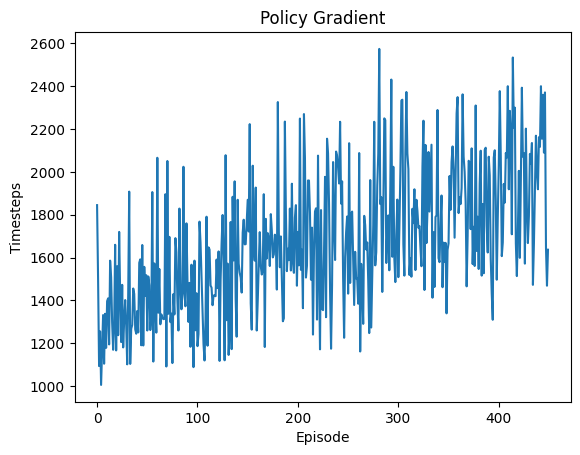

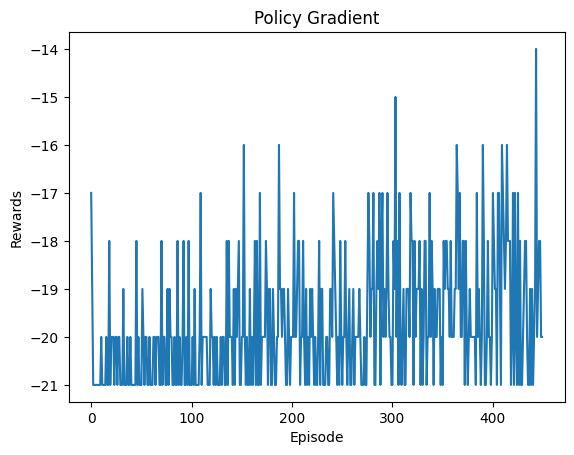

In [ ]:
""" Majority of this code was copied directly from Andrej Karpathy's gist:
https://gist.github.com/karpathy/a4166c7fe253700972fcbc77e4ea32c5 """

""" Trains an agent with (stochastic) Policy Gradients on Pong. Uses OpenAI Gym. """
import numpy as np
import pickle
import gym
import matplotlib.pyplot as plt

from gym import wrappers

# hyperparameters to tune
H = 200 # number of hidden layer neurons
batch_size = 10 # used to perform a RMS prop param update every batch_size steps
learning_rate = 1e-3 # learning rate used in RMS prop
gamma = 0.99 # discount factor for reward
decay_rate = 0.99 # decay factor for RMSProp leaky sum of grad^2

# Config flags - video output and res
resume = False # resume training from previous checkpoint (from save.p  file)?
render = False # render video output?

# model initialization
D = 75 * 80 # input dimensionality: 75x80 grid
if resume:
  model = pickle.load(open('save.p', 'rb'))
else:
  model = {}
  model['W1'] = np.random.randn(H,D) / np.sqrt(D) # "Xavier" initialization - Shape will be H x D
  model['W2'] = np.random.randn(H) / np.sqrt(H) # Shape will be H

grad_buffer = { k : np.zeros_like(v) for k,v in model.items() } # update buffers that add up gradients over a batch
rmsprop_cache = { k : np.zeros_like(v) for k,v in model.items() } # rmsprop memory

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x)) # sigmoid "squashing" function to interval [0,1]

def prepro(I):
  """ prepro 210x160x3 uint8 frame into 6000 (75x80) 1D float vector """
  I = I[35:185] # crop - remove 35px from start & 25px from end of image in x, to reduce redundant parts of image (i.e. after ball passes paddle)
  I = I[::2,::2,0] # downsample by factor of 2.
  I[I == 144] = 0 # erase background (background type 1)
  I[I == 109] = 0 # erase background (background type 2)
  I[I != 0] = 1 # everything else (paddles, ball) just set to 1. this makes the image grayscale effectively
  return I.astype(np.float).ravel() # ravel flattens an array and collapses it into a column vector

def discount_rewards(r):
  """ take 1D float array of rewards and compute discounted reward """
  """ this function discounts from the action closest to the end of the completed game backwards
  so that the most recent action has a greater weight """
  discounted_r = np.zeros_like(r)
  running_add = 0
  for t in reversed(range(0, r.size)): # xrange is no longer supported in Python 3
    if r[t] != 0: running_add = 0 # reset the sum, since this was a game boundary (pong specific!)
    running_add = running_add * gamma + r[t]
    discounted_r[t] = running_add
  return discounted_r

def policy_forward(x):
  """This is a manual implementation of a forward prop"""
  h = np.dot(model['W1'], x) # (H x D) . (D x 1) = (H x 1) (200 x 1)
  h[h<0] = 0 # ReLU introduces non-linearity
  logp = np.dot(model['W2'], h) # This is a logits function and outputs a decimal.   (1 x H) . (H x 1) = 1 (scalar)
  p = sigmoid(logp)  # squashes output to  between 0 & 1 range
  return p, h # return probability of taking action 2 (UP), and hidden state

def policy_backward(eph, epx, epdlogp):
  """ backward pass. (eph is array of intermediate hidden states) """
  """ Manual implementation of a backward prop"""
  """ It takes an array of the hidden states that corresponds to all the images that were
  fed to the NN (for the entire episode, so a bunch of games) and their corresponding logp"""
  dW2 = np.dot(eph.T, epdlogp).ravel()
  dh = np.outer(epdlogp, model['W2'])
  dh[eph <= 0] = 0 # backpro prelu
  dW1 = np.dot(dh.T, epx)
  return {'W1':dW1, 'W2':dW2}

env = gym.make("Pong-v0")
# env = wrappers.Monitor(env, 'tmp/pong-base', force=True) # record the game as as an mp4 file
observation = env.reset()
prev_x = None # used in computing the difference frame
xs,hs,dlogps,drs = [],[],[],[]
running_reward = None
rewards = []
reward_sum = 0
episode_number = 0
MAX_EPISODES = 450

timesteps = []
timestep = 0

while True:
  if render: env.render()

  # preprocess the observation, set input to network to be difference image
  cur_x = prepro(observation)
  # we take the difference in the pixel input, since this is more likely to account for interesting information
  # e.g. motion
  x = cur_x - prev_x if prev_x is not None else np.zeros(D)
  prev_x = cur_x

  # forward the policy network and sample an action from the returned probability
  aprob, h = policy_forward(x)
  # The following step is randomly choosing a number which is the basis of making an action decision
  # If the random number is less than the probability of UP output from our neural network given the image
  # then go down.  The randomness introduces 'exploration' of the Agent
  action = 2 if np.random.uniform() < aprob else 3 # roll the dice! 2 is UP, 3 is DOWN, 0 is stay the same

  # record various intermediates (needed later for backprop).
  # This code would have otherwise been handled by a NN library
  xs.append(x) # observation
  hs.append(h) # hidden state
  y = 1 if action == 2 else 0 # a "fake label" - this is the label that we're passing to the neural network
  # to fake labels for supervised learning. It's fake because it is generated algorithmically, and not based
  # on a ground truth, as is typically the case for Supervised learning

  dlogps.append(y - aprob) # grad that encourages the action that was taken to be taken (see http://cs231n.github.io/neural-networks-2/#losses if confused)

  # step the environment and get new measurements
  observation, reward, done, info = env.step(action)
  timestep += 1
  reward_sum += reward
  drs.append(reward) # record reward (has to be done after we call step() to get reward for previous action)

  if done: # an episode finished
    timesteps.append(timestep+1)
    timestep = 0

    episode_number += 1

    # stack together all inputs, hidden states, action gradients, and rewards for this episode
    epx = np.vstack(xs)
    eph = np.vstack(hs)
    epdlogp = np.vstack(dlogps)
    epr = np.vstack(drs)
    xs,hs,dlogps,drs = [],[],[],[] # reset array memory

    # compute the discounted reward backwards through time
    discounted_epr = discount_rewards(epr)
    # standardize the rewards to be unit normal (helps control the gradient estimator variance)
    discounted_epr -= np.mean(discounted_epr)
    discounted_epr /= np.std(discounted_epr)

    epdlogp *= discounted_epr # modulate the gradient with advantage (Policy Grad magic happens right here.)
    grad = policy_backward(eph, epx, epdlogp)
    for k in model: grad_buffer[k] += grad[k] # accumulate grad over batch

    # perform rmsprop parameter update every batch_size episodes
    if episode_number % batch_size == 0:
      for k,v in model.items():
        g = grad_buffer[k] # gradient
        rmsprop_cache[k] = decay_rate * rmsprop_cache[k] + (1 - decay_rate) * g**2
        model[k] += learning_rate * g / (np.sqrt(rmsprop_cache[k]) + 1e-5)
        grad_buffer[k] = np.zeros_like(v) # reset batch gradient buffer

    rewards.append(reward_sum)
    # boring book-keeping
    running_reward = reward_sum if running_reward is None else running_reward * 0.99 + reward_sum * 0.01
    print('resetting env. episode reward total was %f. running mean: %f' % (reward_sum, running_reward))

    if episode_number == MAX_EPISODES: break
    # if episode_number % 100 == 0: pickle.dump(model, open('save.p', 'wb'))
    reward_sum = 0
    observation = env.reset() # reset env
    prev_x = None

  # if reward != 0: # Pong has either +1 or -1 reward exactly when game ends.
    # print ('ep %d: game finished, reward: %f' % (episode_number, reward)) + ('' if reward == -1 else ' !!!!!!!!')

fig, ax = plt.subplots()
ax.plot(range(episode_number), timesteps)
ax.set(xlabel="Episode", ylabel="Timesteps", title="Policy Gradient")
plt.show()

fig, ax = plt.subplots()
ax.plot(range(episode_number), rewards)
ax.set(xlabel="Episode", ylabel="Rewards", title="Policy Gradient")
plt.show()

# Question 4
In this question, you are expected to code up the behavior cloning algorithm discussed in class.
Please take the cartpole-v0 example from Gym and find expert trajectories. Please use the DQN
algorithm from the StableBaselines library.

For the obtained set of expert trajectories, please train the policy neural network (single hidden
layer) as per the Behavioral Cloning algorithm. The obtained policy network is the imitation learning
solution.
Plot how well the policy learnt by Behavior Cloning performs across multiple simulations (10) on
average for 5 different numbers of expert trajectories.

In [ ]:
%%bash
pip install "gym[atari, accept-rom-license]"

In [ ]:
import gym
gym.envs.registration.registry.keys()

In [ ]:
!pip install stable-baselines3

In [ ]:
!pip install shimmy

In [ ]:
!pip install imitation

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN
from imitation.data import rollout
from imitation.algorithms import bc
import matplotlib.pyplot as plt

rng = np.random.default_rng()
vec_env = make_vec_env(
    "seals:seals/CartPole-v0",
    rng=np.random.default_rng(),
    post_wrappers=[
        lambda env, _: RolloutInfoWrapper(env)
    ],  # needed for computing rollouts later
)

expert = DQN("MlpPolicy", vec_env, verbose=1).learn(total_timesteps=10000, log_interval=4)

bc_rewards = []
NUM_TRAJECTORIES = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for num_trajectories in NUM_TRAJECTORIES:

  rollouts = rollout.rollout(
      expert,
      vec_env,
      rollout.make_sample_until(min_timesteps=None, min_episodes=num_trajectories),
      rng=rng,
  )
  transitions = rollout.flatten_trajectories(rollouts)

  print(
      f"""The `rollout` function generated a list of {len(rollouts)} {type(rollouts[0])}.
  After flattening, this list is turned into a {type(transitions)} object containing {len(transitions)} transitions.
  The transitions object contains arrays for: {', '.join(transitions.__dict__.keys())}."
  """
  )

  bc_trainer = bc.BC(
      observation_space=env.observation_space,
      action_space=env.action_space,
      demonstrations=transitions,
      rng=rng,
  )

  reward_before_training, _ = evaluate_policy(bc_trainer.policy, env, 10)
  print(f"Reward before training: {reward_before_training}")

  bc_trainer.train(n_epochs=1)

  reward_after_training, _ = evaluate_policy(bc_trainer.policy, env, 10)
  print(f"Reward after training: {reward_after_training}")

  bc_rewards.append(reward_after_training)

plt.plot(NUM_TRAJECTORIES, bc_rewards)
plt.xlabel('Number of Expert Trajectories')
plt.ylabel('Average Reward')
plt.show()